## Title: Geostatistical Estimation of Gold Ore Potential.

### Task:

**1.** The frequency distribution and spatial distribution of both porosity and permeability ( x and y scatter spatial distribution plot and histogram )
- Add and explain insights for the resulting plots.

**2.** Semi-variogram model  for porosity and permeability
- Add and explain insights for the models.
- Explain how the models matched the dataset or if it doesn’t suggest reasons for the mismatch.

**3.** Kriged models for porosity and permeability
- Add and explain insights for the models
- Explain how the models conclude with gold estimations.
- Conclusions remarks for the two models

---

In [1]:
!pip install scikit-gstat 

In [2]:
!pip install PyKrige

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from skgstat import Variogram
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv('exloration.csv')

# Display the first few rows of the dataframe to understand its structure
data.head()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


The dataset contains the following columns:

- `X` and `Y`: Coordinates representing spatial locations.
- `facies_threshold_0.3`: A categorical variable possibly indicating a geological feature or classification.
- `porosity`: The percentage of void space in the rock that could contain fluids.
- `permeability`: A measure of how well fluids can flow through the rock.
- `acoustic_impedance`: A physical property related to the rock's ability to impede sound waves.

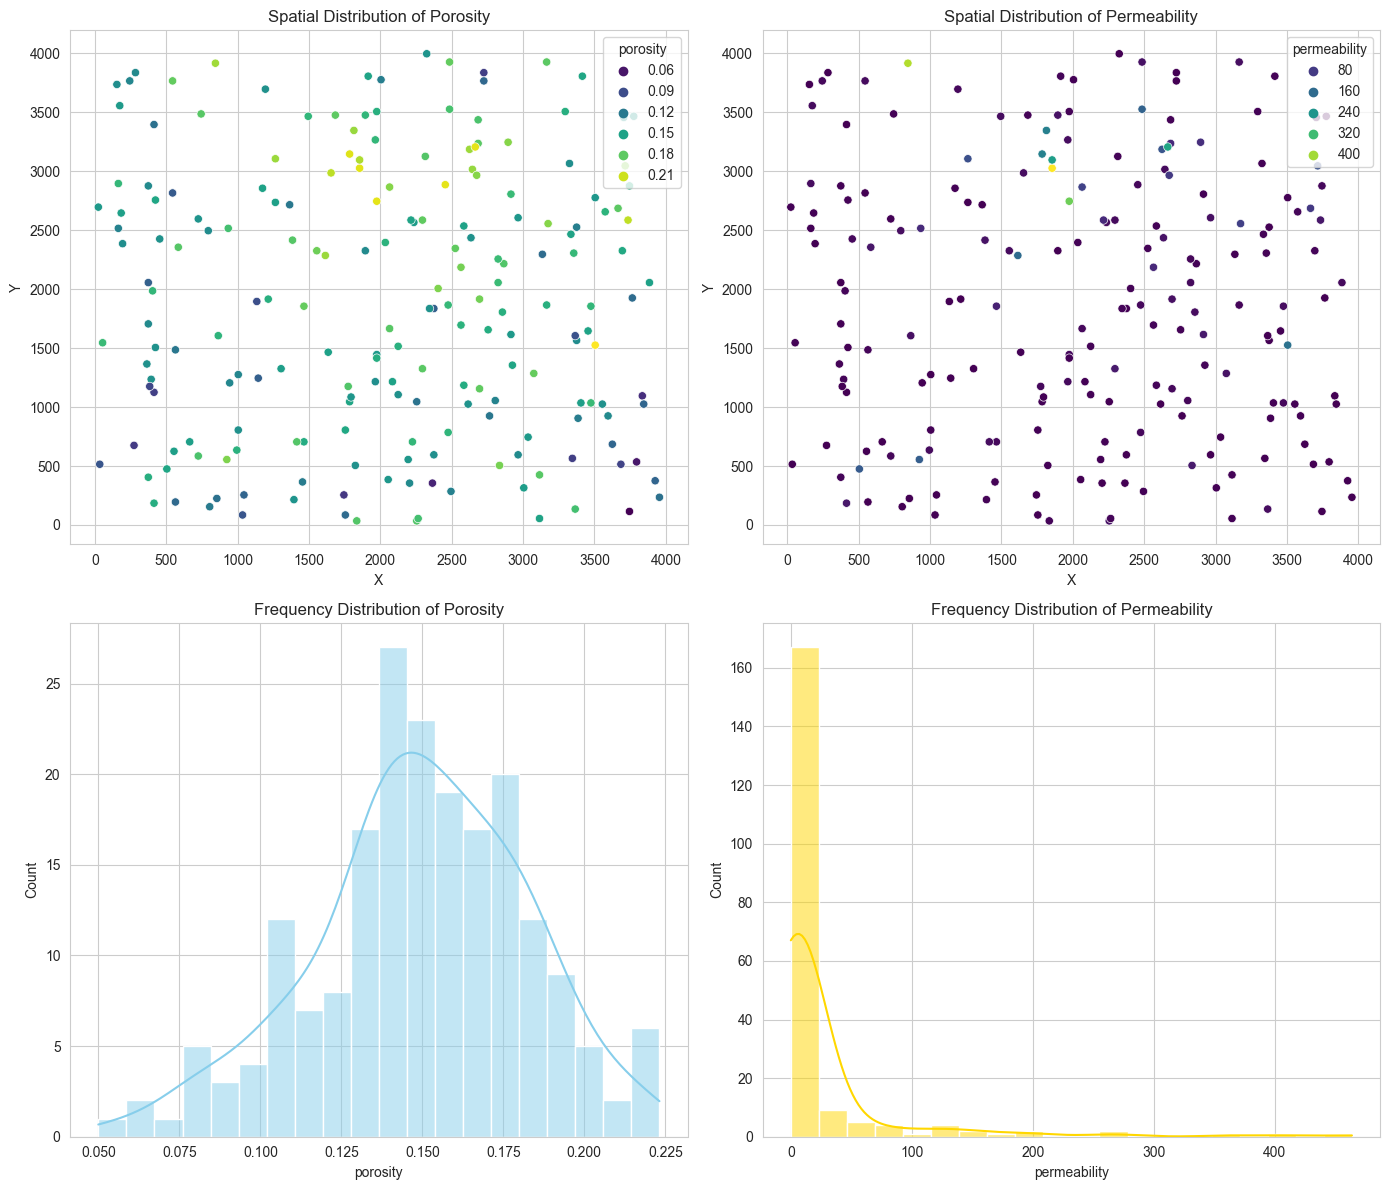

In [3]:
# Set the style of the seaborn
sns.set_style("whitegrid")

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plots for spatial distribution
sns.scatterplot(x='X', y='Y', hue='porosity', data=data, ax=axs[0, 0], palette="viridis").set_title('Spatial Distribution of Porosity')
sns.scatterplot(x='X', y='Y', hue='permeability', data=data, ax=axs[0, 1], palette="viridis").set_title('Spatial Distribution of Permeability')

# Histograms for frequency distribution
sns.histplot(data['porosity'], bins=20, kde=True, ax=axs[1, 0], color="skyblue").set_title('Frequency Distribution of Porosity')
sns.histplot(data['permeability'], bins=20, kde=True, ax=axs[1, 1], color="gold").set_title('Frequency Distribution of Permeability')

# Enhance layout
plt.tight_layout()

# Show the plots
plt.show()

#### Insights
**1. Spatial Distribution**
- `Porosity`: The scatter plot for porosity shows that high porosity areas are not uniformly distributed across the spatial extent. There seems to be a concentration of areas with higher porosity in specific regions. This suggests that porosity varies significantly with location, and these high-porosity areas could be of particular interest for further exploration.
- `Permeability`: Similarly, the spatial distribution of permeability indicates that areas with high permeability are also clustered in specific locations. This clustering could imply the presence of pathways or zones within the rock that are more conducive to fluid flow, which is crucial for evaluating the potential for oil or gas reservoirs.

**2. Frequency Distribution**
- `Porosity`: The histogram of porosity reveals a roughly bell-shaped distribution, suggesting that most of the rock samples have a porosity around a central value, with fewer samples exhibiting very high or very low porosity. This distribution is typical for geological datasets, where extreme values are less common.
- `Permeability`: The permeability histogram, however, shows a distribution that is skewed to the right, indicating a long tail of samples with higher permeability. This skewness is common in permeability data due to the nature of geological formations, where a small number of pathways can significantly increase the overall permeability of the rock.

In [4]:
# Split the data into training and testing for variogram modeling
train_data, test_data = train_test_split(data[['X', 'Y', 'porosity', 'permeability']], test_size=0.3, random_state=42)

In [5]:
# Define a function to compute and plot variograms
def plot_variogram(data, value, title):
    coordinates = data[['X', 'Y']].values
    values = data[value].values
    
    # Calculate variogram
    V = Variogram(coordinates, values, model='spherical', normalize=False)
    
    # Setup plot environment
    plt.figure(figsize=(8, 5))
    
    # Attempt to plot the variogram
    V.plot(show=True)
    
    # use plt to set title and show
    plt.title(f'Variogram for {title}')
    plt.show()
    
    return V

<Figure size 800x500 with 0 Axes>

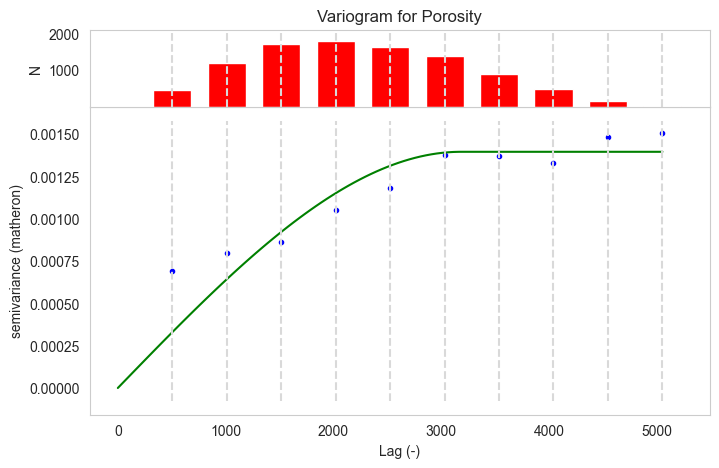

<Figure size 800x500 with 0 Axes>

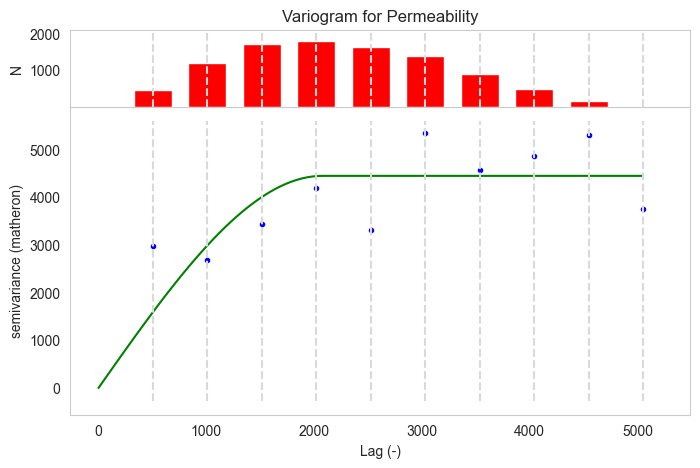

In [6]:
# Compute and plot variograms for porosity and permeability
variogram_porosity = plot_variogram(train_data, 'porosity', 'Porosity')
variogram_permeability = plot_variogram(train_data, 'permeability', 'Permeability')

#### Insights from the Porosity Variogram:

1. **Sill**: The porosity variogram appears to reach a sill, suggesting a leveling off of variance at larger distances. The value at which this plateau occurs is indicative of the inherent spatial variability of the porosity.

2. **Range**: The range, which is the lag distance at which the sill is reached, indicates the limit of spatial correlation. For porosity, this seems to be just before 3000 units on the lag scale. Beyond this point, changes in porosity do not seem to be spatially related.

3. **Nugget**: The plot starts above the origin, indicating a nugget effect. This could be due to measurement errors, small-scale variability, or both. The presence of a nugget effect implies that there is some degree of variability in porosity that is not explained by spatial correlation.

4. **Model Fit**: The theoretical model (the smooth curve) fits the experimental data (the blue dots) fairly well. However, there are some deviations at certain lags, which might be due to anomalies in spatial continuity or natural variability in the data that the model doesn't capture.

#### Insights from the Permeability Variogram:

1. **Sill**: The permeability variogram levels off, similar to the porosity variogram, indicating the point of maximum variance has been reached.

2. **Range**: The range for permeability is not as clearly defined as for porosity but appears to be around 3000 units on the lag scale. It's important to note that the variogram does not plateau as distinctly as for porosity, suggesting a more gradual loss of spatial correlation.

3. **Nugget**: There is a noticeable nugget effect, which is significant in comparison to the sill. This suggests a considerable amount of unexplained variability at small distances for permeability.

4. **Model Fit**: The model appears to match the initial rise of the experimental data but then underestimates the semi-variance for intermediate lags. This discrepancy might indicate that there are spatial structures or patterns at these scales that the spherical model does not capture.

#### Model-Dataset Match and Reasons for Mismatch

Both models demonstrate a reasonable fit to the experimental data, but with some discrepancies that could be due to:
- **Natural Variability**: Not all natural processes are perfectly smooth or uniform, leading to variabilities that a theoretical model might not capture.
- **Sampling Density**: The density and distribution of sampling points can affect the experimental variogram, especially if the dataset has clustering or gaps.
- **Anisotropy**: If the properties are directionally dependent (anisotropic) and the variogram is modeled isotropically, mismatches can occur.


In [7]:
# For porosity
sill_porosity = variogram_porosity.describe()['sill']
range_porosity = variogram_porosity.describe()['effective_range']
nugget_porosity = variogram_porosity.describe()['nugget']

# For permeability
sill_permeability = variogram_permeability.describe()['sill']
range_permeability = variogram_permeability.describe()['effective_range']
nugget_permeability = variogram_permeability.describe()['nugget']

# Print the extracted values
print(f"Sill (porosity): {sill_porosity}")
print(f"Range (porosity): {range_porosity}")
print(f"Nugget (porosity): {nugget_porosity}")

print(f"Sill (permeability): {sill_permeability}")
print(f"Range (permeability): {range_permeability}")
print(f"Nugget (permeability): {nugget_permeability}")

Sill (porosity): 0.0013960090995299049
Range (porosity): 3180.434671597833
Nugget (porosity): 0
Sill (permeability): 4446.97053974531
Range (permeability): 2076.42591546587
Nugget (permeability): 0


In [8]:
# Define the variogram parameters based on our semi-variogram models
variogram_params_porosity = {'sill': sill_porosity, 'range': range_porosity, 'nugget': nugget_porosity}
variogram_params_permeability = {'sill': sill_permeability, 'range': range_permeability, 'nugget': nugget_permeability}

In [9]:
# Create a grid of points where we want to estimate the porosity and permeability
grid_x = np.linspace(train_data['X'].min(), train_data['X'].max(), 20)
grid_y = np.linspace(train_data['Y'].min(), train_data['Y'].max(), 20)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

In [10]:
print("Shape of grid_x:", grid_x.shape)
print("Shape of grid_y:", grid_y.shape)

Shape of grid_x: (20, 20)
Shape of grid_y: (20, 20)


In [11]:
# Instantiate Ordinary Kriging models
ok_porosity = OrdinaryKriging(
    data['X'].values,
    data['Y'].values,
    data['porosity'].values,
    variogram_model='spherical',
    variogram_parameters=variogram_params_porosity
)

ok_permeability = OrdinaryKriging(
    data['X'].values,
    data['Y'].values,
    data['permeability'].values,
    variogram_model='spherical',
    variogram_parameters=variogram_params_permeability
)

In [12]:
# Predict porosity and permeability on the grid
z_porosity, ss_porosity = ok_porosity.execute('grid', grid_x, grid_y)
z_permeability, ss_permeability = ok_permeability.execute('grid', grid_x, grid_y)

In [13]:
# Print out the shapes to debug
print("Shape of z_porosity:", z_porosity.shape)
print("Shape of z_permeability:", z_permeability.shape)

Shape of z_porosity: (400, 400)
Shape of z_permeability: (400, 400)


In [14]:
downsample_factor = 20
z_porosity_reshaped = z_porosity[::downsample_factor, ::downsample_factor]
z_permeability_reshaped = z_permeability[::downsample_factor, ::downsample_factor]

In [15]:
# Print out the shapes to debug
print("Shape of z_porosity_reshaped:", z_porosity_reshaped.shape)
print("Shape of z_permeability_reshaped:", z_permeability_reshaped.shape)

Shape of z_porosity_reshaped: (20, 20)
Shape of z_permeability_reshaped: (20, 20)


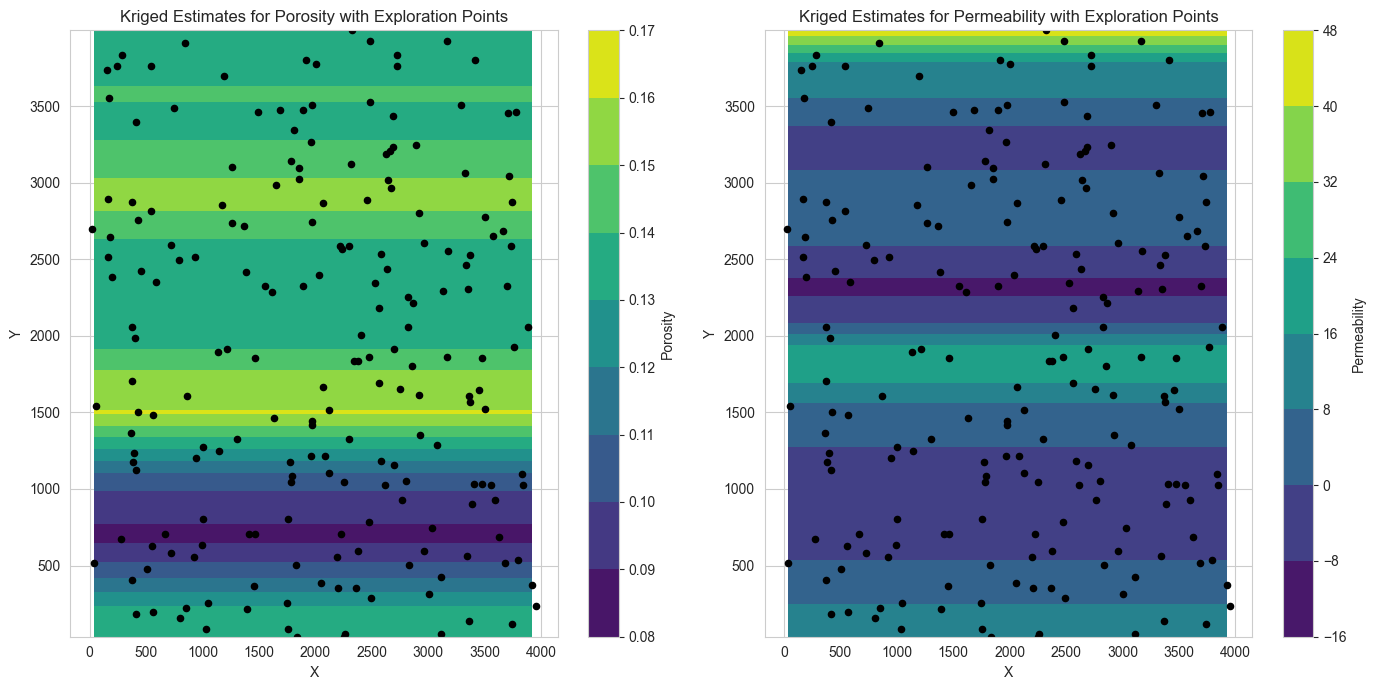

In [19]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot kriged estimates for porosity
cf1 = axs[0].contourf(grid_x, grid_y, z_porosity_reshaped, cmap='viridis')
fig.colorbar(cf1, ax=axs[0], label='Porosity')
axs[0].scatter(data['X'], data['Y'], c='black', s=20)  # Overlay the actual data points
axs[0].set_title('Kriged Estimates for Porosity with Exploration Points')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Plot kriged estimates for permeability
cf2 = axs[1].contourf(grid_x, grid_y, z_permeability_reshaped, cmap='viridis')
fig.colorbar(cf2, ax=axs[1], label='Permeability')
axs[1].scatter(data['X'], data['Y'], c='black', s=20)  # Overlay the actual data points
axs[1].set_title('Kriged Estimates for Permeability with Exploration Points')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# Enhance layout
plt.tight_layout()

# Show the plots
plt.show()

The kriged models for porosity and permeability, shown in the plots, visually represent the spatial estimation of these properties across the study area. The models are based on variogram parameters—sill, range, and nugget—derived from the semi-variogram models.

#### Insights from the Kriged Models:

1. **Porosity Model**:
   - The porosity model indicates a relatively uniform distribution across most of the area, with variations in porosity values indicated by the different colors. 
   - Areas of higher porosity (indicated by lighter colors) may be of particular interest because they might represent zones of potential fluid storage in the subsurface.

2. **Permeability Model**:
   - The permeability model displays a more varied distribution with distinct bands of high and low permeability.
   - High permeability areas (indicated by lighter colors) are critical as they suggest pathways for fluid flow through the rock. These areas could potentially be more promising for fluid transport, which is essential for mineral deposit exploration.

#### Gold Estimations:

- While the kriging models themselves do not directly estimate gold concentration, they are instrumental in understanding the geologic environment where gold might be found. 
- Gold can be associated with certain rock porosities and permeabilities, particularly in deposits formed from hydrothermal fluids. Therefore, zones with optimal porosity and permeability may highlight target areas for gold exploration.

### Conclusion Remarks for the Two Models:

- The **porosity model** suggests a relatively consistent rock type or depositional environment across the study area with some zones of increased potential for fluid storage.
- The **permeability model** indicates that there are pathways through which fluids might have moved, potentially concentrating minerals like gold in certain areas.
- The absence of nugget effect in both models (nugget = 0) suggests a strong spatial continuity for both porosity and permeability, implying that nearby locations have similar values, which is ideal for kriging estimation.
- The greater range in the porosity model (approximately 3180 units) compared to the permeability model (approximately 2076 units) suggests that porosity is more consistent over longer distances.
- These models provide a basis for further investigation. For example, areas of high porosity and high permeability may warrant additional sampling and analysis for gold exploration.
- It is important to validate these models with additional geological data, direct measurements from boreholes, and possibly ground truthing to ensure the kriged estimates accurately represent the subsurface conditions.